In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('../datasets/IRIS_DATASET.csv')

x = df.iloc[:,:-1]
y = df.iloc[:, -1]

sc = StandardScaler()
x_sc = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_sc, y, test_size = 0.25)

model = DecisionTreeClassifier(
    criterion = 'entropy',
    random_state = 42,
    max_depth = 3
)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Accuracy : ', accuracy_score(y_test, y_pred)*100)

print(classification_report(y_test, y_pred))

Accuracy :  97.36842105263158
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



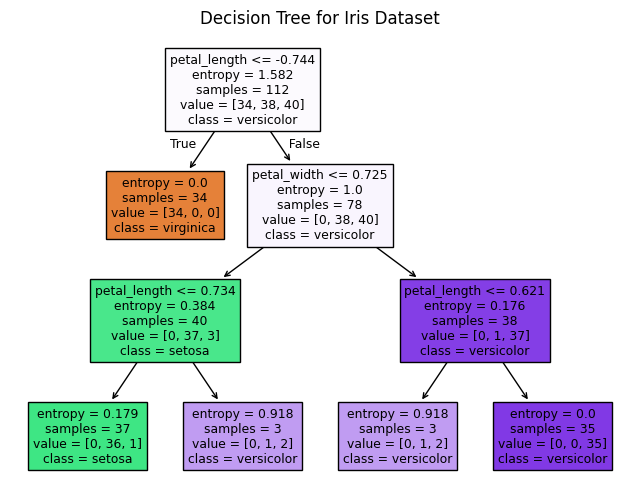

In [41]:
s = set()
for i in df.iloc[:,-1]:
    s.add(i)

plt.figure(figsize=(8, 6))
tree.plot_tree(
    model,
    filled = True,
    feature_names = df.columns,
    class_names = list(s)
)
plt.title('Decision Tree for Iris Dataset')
plt.show()